<a href="https://colab.research.google.com/github/HANEENA001/my-new-repo/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.To predict the profite made by a startup on the basis of expenses incurred and the state where they operate

In [94]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [95]:
df = pd.read_csv('/content/drive/MyDrive/colab works/50_Startups.csv')

In [96]:
len(df)

50

In [97]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [98]:
df.shape

(50, 5)

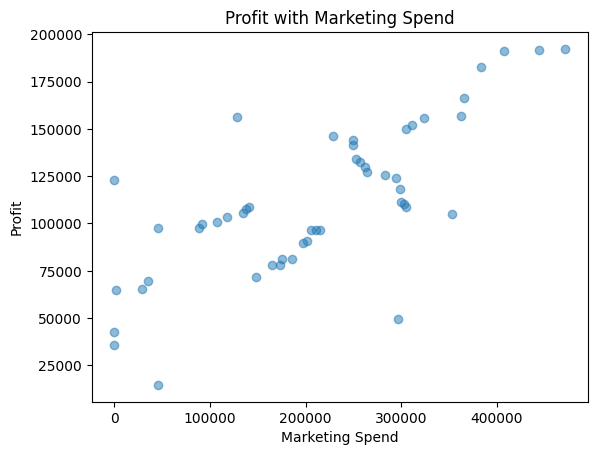

In [99]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.5)
plt.title('Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

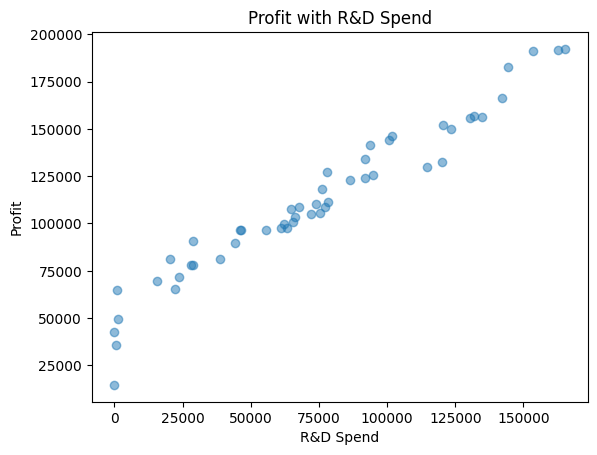

In [100]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha=0.5)
plt.title('Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

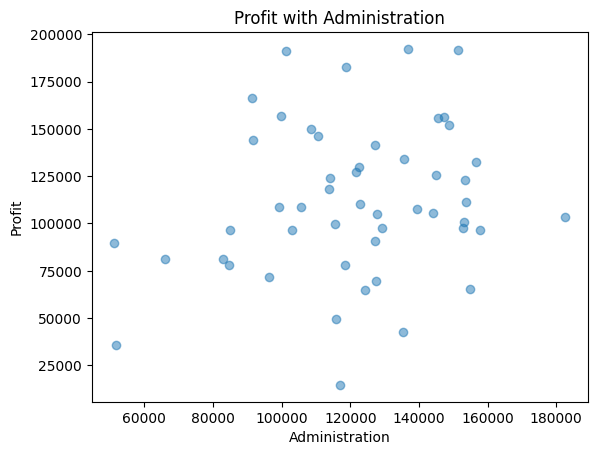

In [101]:
plt.scatter(df['Administration'], df['Profit'], alpha=0.5)
plt.title('Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

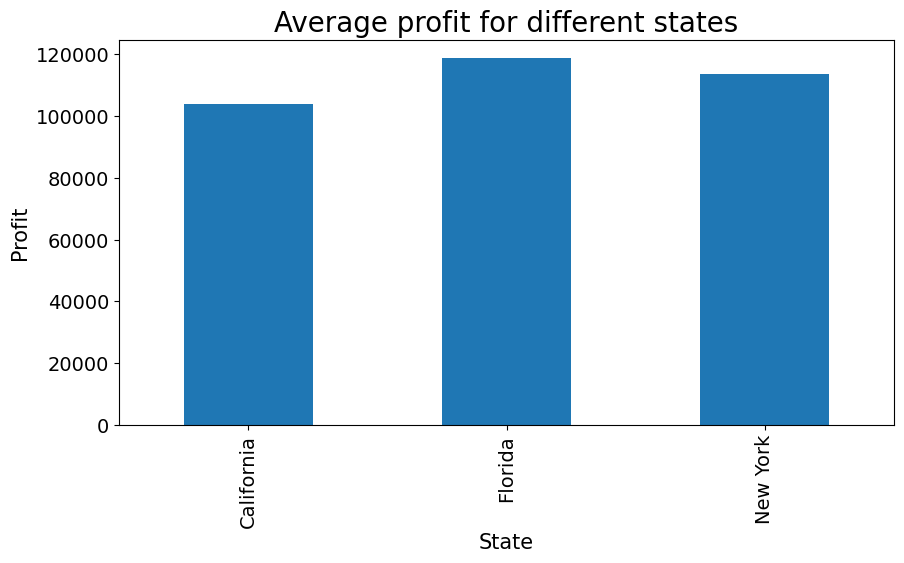

In [102]:
abc= df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = (14))
abc.set_title("Average profit for different states", fontsize = 20)
abc.set_xlabel("State", fontsize = 15)
abc.set_ylabel("Profit", fontsize = 15)

In [103]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [104]:
df['NewYork'] = np.where(df['State']=='New York', 1, 0)
df['California'] = np.where(df['State']=='California', 1, 0)
df['Florida'] = np.where(df['State']=='Florida', 1, 0)

df.drop(columns=['State'],axis=1,inplace=True)

In [105]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [120]:
dependent_var = 'Profit'

In [121]:
independent_var = list(set(df.columns.tolist()) - {dependent_var})

In [122]:
independent_var

['Florida',
 'Marketing Spend',
 'R&D Spend',
 'NewYork',
 'Administration',
 'California']

In [129]:
y = df[dependent_var].values

In [139]:
X = df[independent_var].values

In [131]:
df[independent_var]

,Florida,Marketing Spend,R&D Spend,NewYork,Administration,California
0,0,471784.10,165349.20,1,136897.80,0
1,0,443898.53,162597.70,0,151377.59,1
2,1,407934.54,153441.51,0,101145.55,0
3,0,383199.62,144372.41,1,118671.85,0
4,1,366168.42,142107.34,0,91391.77,0
5,0,362861.36,131876.90,1,99814.71,0
6,0,127716.82,134615.46,0,147198.87,1
7,1,323876.68,130298.13,0,145530.06,0
8,0,311613.29,120542.52,1,148718.95,0
9,0,304981.62,123334.88,0,108679.17,1


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [141]:
X_train[0:10]

array([[1.0000000e+00, 2.1463481e+05, 5.5493950e+04, 0.0000000e+00,
        1.0305749e+05, 0.0000000e+00],
       [0.0000000e+00, 2.0551764e+05, 4.6014020e+04, 1.0000000e+00,
        8.5047440e+04, 0.0000000e+00],
       [1.0000000e+00, 1.3405007e+05, 7.5328870e+04, 0.0000000e+00,
        1.4413598e+05, 0.0000000e+00],
       [0.0000000e+00, 2.1079767e+05, 4.6426070e+04, 0.0000000e+00,
        1.5769392e+05, 1.0000000e+00],
       [1.0000000e+00, 2.9491957e+05, 9.1749160e+04, 0.0000000e+00,
        1.1417579e+05, 0.0000000e+00],
       [1.0000000e+00, 3.2387668e+05, 1.3029813e+05, 0.0000000e+00,
        1.4553006e+05, 0.0000000e+00],
       [1.0000000e+00, 2.5651292e+05, 1.1994324e+05, 0.0000000e+00,
        1.5654742e+05, 0.0000000e+00],
       [0.0000000e+00, 1.9039300e+03, 1.0002300e+03, 1.0000000e+00,
        1.2415304e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.4205000e+02, 1.0000000e+00,
        5.1743150e+04, 0.0000000e+00],
       [0.0000000e+00, 1.0713838e+05,

In [142]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
X_train[0:10]

array([[1.        , 0.45494286, 0.33561668, 0.        , 0.48655174,
        0.        ],
       [0.        , 0.43561799, 0.2782839 , 1.        , 0.3173015 ,
        0.        ],
       [1.        , 0.28413435, 0.45557444, 0.        , 0.87258866,
        0.        ],
       [0.        , 0.44680961, 0.2807759 , 0.        , 1.        ,
        1.        ],
       [1.        , 0.62511553, 0.55488118, 0.        , 0.59103645,
        0.        ],
       [1.        , 0.68649342, 0.7880179 , 0.        , 0.88568959,
        0.        ],
       [1.        , 0.54370828, 0.72539353, 0.        , 0.98922572,
        0.        ],
       [0.        , 0.0040356 , 0.0060492 , 1.        , 0.6847981 ,
        0.        ],
       [0.        , 0.        , 0.00327821, 1.        , 0.00432296,
        0.        ],
       [0.        , 0.22709197, 0.39676926, 1.        , 0.95618996,
        0.        ]])

In [146]:
regression = LinearRegression().fit(X,y)
regression.score(X,y)

0.9507524843355148

In [149]:
regression.coef_

array([ 1.46488202e+02,  2.69798610e-02,  8.06023114e-01, -9.41876104e+01,
       -2.70043196e-02, -5.23005912e+01])

In [150]:
regression.intercept_

50177.64442291133

In [161]:
predict = regression.predict(X_train)

In [152]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [155]:
y_pred = regression.predict(X_test)

In [156]:
y_pred

array([50324.42802415, 50125.83857681, 50324.62747077, 50324.26951586,
       50324.89127627, 50083.80907652, 50083.56229834, 50083.73413978,
       50324.49252486, 50324.83611269])

In [157]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [159]:
mean_squared_error(y_test,y_pred)

6466239336.255155

In [162]:
math.sqrt(mean_squared_error(y_train, predict))

71780.18946052482

In [163]:
math.sqrt(mean_squared_error(y_test, y_pred))

80412.93015588447

In [164]:
r2_score(y_train, predict)

-2.1465570301521595

In [165]:
r2_score(y_test,y_pred)

-4.056127799754466